In [1]:
import sys
sys.path.append('../utils')
sys.path.append('../core')
sys.path.append('../')
import numpy as np
import scipy
import tqdm
import utils
import geometry
from core import *

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import glob

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
test_phantom = phantom.Phantom(source_path = None,
            voxel_dims = (0.5e-3,0.5e-3,0.5e-3),
            matrix_dims = (100,100,100),
            baseline = (1500, 1000),
            seed = 5678,)

blood = tissue.Tissue(name='blood', c=1578, rho=1060, sigma=5.3, scale=0.00001, label=1)
myocardium = tissue.Tissue(name='myocardium', c=1561.3, rho=1081, sigma=30, scale=0.0001, label=2)
fat = tissue.Tissue(name='fat', c=1450, rho=920, sigma=10, scale=0.0001, label=3)

pos = 0.6

# test_phantom.add_tissue_sphere((pos,-pos,0), 2, blood)
# test_phantom.add_tissue_sphere((pos,0,0), 4, blood)
# test_phantom.add_tissue_sphere((pos,pos,0), 8, blood)

# test_phantom.add_tissue_sphere((-pos,-pos,0), 4, fat)
# test_phantom.add_tissue_sphere((-pos,0,0), 8, fat)
# test_phantom.add_tissue_sphere((-pos,pos,0), 2, fat)

# test_phantom.add_tissue_sphere((0,-pos,0), 8, myocardium)
# test_phantom.add_tissue_sphere((0,0,0), 2, myocardium)
# test_phantom.add_tissue_sphere((0,pos,0), 4, myocardium)

test_phantom.add_tissue_sphere((pos,0,0), 4, myocardium)
# test_phantom.add_tissue_sphere((0,-pos,0), 4, myocardium)


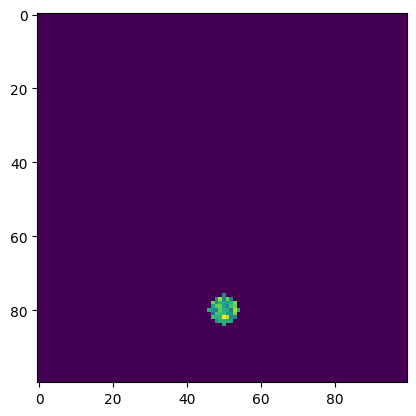

In [3]:
plt.imshow(test_phantom.get_complete()[0,:,:,test_phantom.matrix_dims[2]//2])

In [4]:
transducers = [transducer.Planewave(max_frequency=1e6,
                                    elements = 32, 
                                    width = 20e-3,
                                    height =  20e-3,
                                    sensor_sampling_scheme = 'not_centroid', 
                                    sweep = np.pi/6,
                                    ray_num = 3, 
                                    imaging_ndims = 2,
                                    focus_elevation = 20e-3,
                                    ) for i in range(2)]

for t in transducers:
    t.make_sensor_coords(test_phantom.baseline[0])

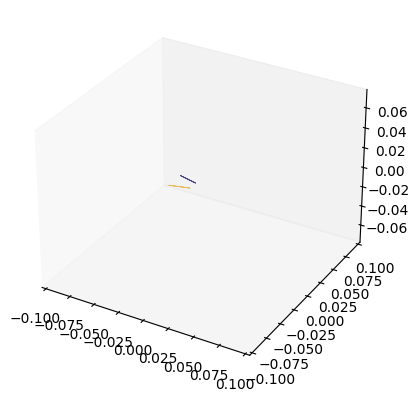

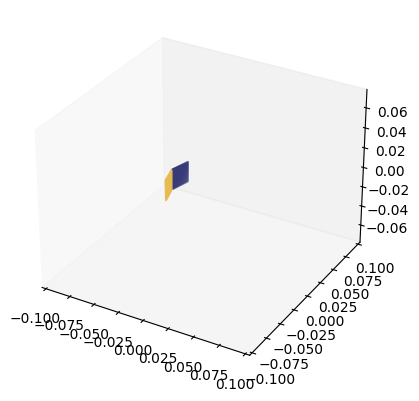

In [5]:
test_transducer_set = transducer_set.TransducerSet(transducers, seed=8888)
# test_transducer_set.generate_extrinsics(shape="spherical", extrinsics_kwargs={'r_mean': 0e-3, 'view_std': 0, 'yaw_fraction': np.pi/3, 'pitch_fraction': 0, 'roll_fraction': 0})
test_transducer_set.assign_pose(0, geometry.Transform([-np.pi/12,0,0], [-0.03,0.01,0]))
test_transducer_set.assign_pose(1, geometry.Transform([np.pi/12,0,0], [-.03,-0.01,0]))
test_transducer_set.plot_transducer_fovs(scale=0.1)
test_transducer_set.plot_transducer_coords(scale=0.1)

In [6]:
# test_sensor = sensor.Sensor(transducer_set=test_transducer_set, aperture_type='pressure_field')
test_sensor = sensor.Sensor(transducer_set=test_transducer_set, aperture_type='extended_aperture')

In [7]:
simprops = simulation.SimProperties(
                grid_size   = (65e-3,60e-3,20e-3),
                voxel_size  = (0.1e-3,0.1e-3,0.1e-3),
                PML_size    = (32,8,8),
                PML_alpha   = 2,
                t_end       = 12e-5,           # [s]
                bona        = 6,               # parameter b/a determining degree of nonlinear acoustic effects
                alpha_coeff = 0.5, 	           # [dB/(MHz^y cm)]
                alpha_power = 1.5,
                )

In [8]:
test_experiment = experiment.Experiment(
                 simulation_path = '../experiment_files/compounding_debugging',
                 sim_properties  = simprops,
                 phantom         = test_phantom,
                 transducer_set  = test_transducer_set,
                 sensor          = test_sensor,
                 nodes           = 1,
                 results         = None,
                 indices         = None,
                 workers         = 1,
                 additional_keys = ['p_max']
                 )

test_experiment.save()

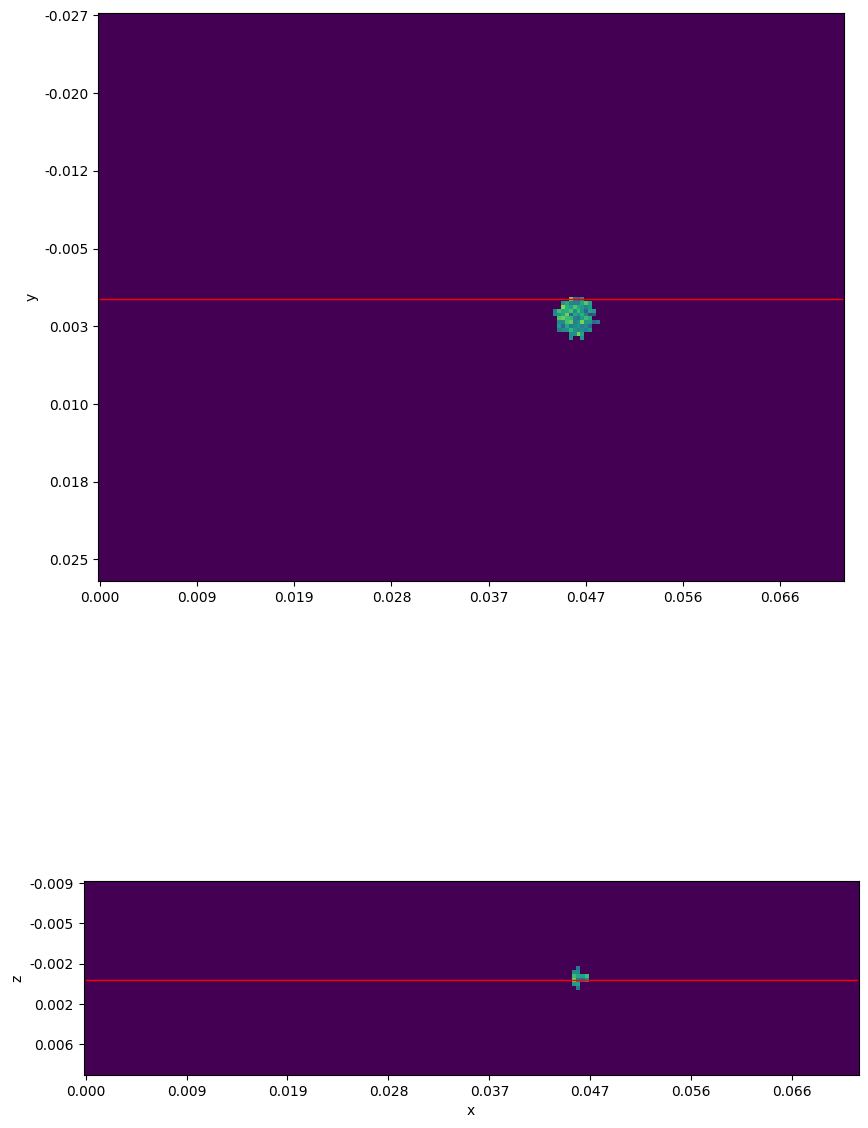

In [9]:
test_experiment.plot_ray_path(0)

In [10]:
test_experiment = experiment.Experiment.load('../experiment_files/compounding_debugging')
test_experiment.run(dry=True)

Number of simulation results (18) is greater than the expected number of simulation results (6), did the experiment parameters change since running?
dry run of simulation


  0%|          | 0/2 [00:00<?, ?it/s]

[[-87  75  13]
 [-73  21  13]
 [-87  75  15]
 ...
 [-87  71  65]
 [-73 125  67]
 [-87  71  67]]
[[-87  75  13]
 [-73  21  13]
 [-87  75  15]
 ...
 [-87  71  65]
 [-73 125  67]
 [-87  71  67]]


 50%|█████     | 1/2 [00:02<00:02,  2.05s/it]

[[-87  75  13]
 [-73  21  13]
 [-87  75  15]
 ...
 [-87  71  65]
 [-73 125  67]
 [-87  71  67]]
[[-87  75  13]
 [-73  21  13]
 [-87  75  15]
 ...
 [-87  71  65]
 [-73 125  67]
 [-87  71  67]]
[[-87  75  13]
 [-73  21  13]
 [-87  75  15]
 ...
 [-87  71  65]
 [-73 125  67]
 [-87  71  67]]


100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

[[-87  75  13]
 [-73  21  13]
 [-87  75  15]
 ...
 [-87  71  65]
 [-73 125  67]
 [-87  71  67]]


In [11]:
test_experiment.run(repeat=True)

running with 1 workers

[[ 0 47 13]
 [27 -1 13]
 [ 0 47 15]
 ...
 [ 1 44 65]
 [ 0 99 67]
 [ 1 44 67]]
preparation for sim    0 completed in            6.63 seconds

[[ 0 47 13]
 [27 -1 13]
 [ 0 47 15]
 ...
 [ 1 44 65]
 [ 0 99 67]
 [ 1 44 67]]
preparation for sim    1 completed in            5.85 seconds

[[ 0 47 13]
 [27 -1 13]
 [ 0 47 15]
 ...
 [ 1 44 65]
 [ 0 99 67]
 [ 1 44 67]]
preparation for sim    2 completed in            4.10 seconds



┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                             256 x 162 x 96 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   1272 │
├───────────────────────────────────────────────────────────────┤
│         

┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                             256 x 162 x 96 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   1272 │
├───────────────────────────────────────────────────────────────┤
│         

┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                             256 x 162 x 96 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   1272 │
├───────────────────────────────────────────────────────────────┤
│         

┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                             256 x 162 x 96 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   1272 │
├───────────────────────────────────────────────────────────────┤
│         

┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                             256 x 162 x 96 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   1272 │
├───────────────────────────────────────────────────────────────┤
│         

┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                             256 x 162 x 96 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   1272 │
├───────────────────────────────────────────────────────────────┤
│         

In [12]:
test_experiment.add_results()

In [13]:
test_reconstruction = reconstruction.Compounding(experiment=test_experiment)

In [14]:
image = test_reconstruction.compound()

 33%|███▎      | 6/18 [00:55<01:50,  9.19s/it]


IndexError: list index out of range

In [ ]:
image.shape

In [ ]:
test_reconstruction.results

In [ ]:
element_15 = np.array([test_reconstruction.results[i][1][15] for i in range(len(test_reconstruction.results))])
element_0 = np.array([test_reconstruction.results[i][1][0] for i in range(len(test_reconstruction.results))])

In [ ]:
plt.plot(element_15.T)

In [ ]:
plt.plot(element_0.T)

In [ ]:
test_reconstruction.results[0]

In [ ]:
plt.imshow(image[:,:,image.shape[2]//2])
plt.colorbar()

In [ ]:
plt.imshow(test_phantom.get_complete()[0,:,:,test_phantom.matrix_dims[2]//2])

In [ ]:
plt.imshow(image[image.shape[0]//2,:,:])
plt.colorbar()

In [ ]:
plt.imshow(image[:,image.shape[1]//2,:])
plt.colorbar()

In [ ]:
plt.imshow(test_phantom.get_complete()[0,:,:,test_phantom.matrix_dims[2]//2])

In [ ]:
im = test_reconstruction.results[0][1]

In [ ]:
im.shape

In [ ]:
for frame in tqdm.tqdm(range(0,im.shape[-1],10)):
    plt.imshow(im[:,:,frame], cmap='bwr')
    plt.colorbar()
    plt.savefig(f'../experiment_files/outputs/frame_{str(frame).zfill(4)}.png', dpi=50)
    plt.close()